# ASTRO 533 - Project 4

**Created:** Oct. 2020   
**Last Edit:** Oct. 2020  

**Author:** Bill Chen  
**Email:** ybchen@umich.edu  

## Load packages and read data

In [111]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.table import Table as tb
import astropy.coordinates as coord
import astropy.units as u
from astropy.units import cds
plt.style.use('bill')

gaiarv_cat = tb.read('./glt13_kin.fits', format='fits')

## Find Hyades

In [75]:
# selection criteria

hyra = 15 *(4 + (26/60) + (54/3600)) # RA
hydec = 15 + (52/12) + (0/3600) # Dec

hy_index, = np.where((abs(gaiarv_cat['ra']-hyra)<10.0)&(abs(gaiarv_cat['dec']-hydec)<9.0)&
                     (abs(gaiarv_cat['pmra']-105.0)<40)&(abs(gaiarv_cat['pmdec']+30.0)<40.0)&
                     (abs(gaiarv_cat['parallax']-21.5)<2))

hy_cat = gaiarv_cat[hy_index]
n_hy = len(hy_index)
print('Number of candidates:', n_hy)

Number of candidates: 127


In [30]:
dist = coord.Distance(parallax=u.Quantity(hy_cat['parallax']))
c = coord.SkyCoord(ra=hy_cat['ra'],
                   dec=hy_cat['dec'],
                   distance=dist,
                   pm_ra_cosdec=hy_cat['pmra'],
                   pm_dec=hy_cat['pmdec'],
                   radial_velocity=hy_cat['radial_velocity'])

coord.Galactocentric()
galcen = c.transform_to(coord.Galactocentric(z_sun=15.3*u.pc,
                                             galcen_distance=8.18*u.kpc,
                                             galcen_v_sun=coord.CartesianDifferential(np.array([11.1,250.1,7.25]),unit=u.kilometer/u.second)))

In [68]:
x_mean = np.mean(galcen.x.value)
y_mean = np.mean(galcen.y.value)
z_mean = np.mean(galcen.z.value)
v_x_mean = np.mean(galcen.v_x.value)
v_y_mean = np.mean(galcen.v_y.value)
v_z_mean = np.mean(galcen.v_z.value)

### Phase space visualization

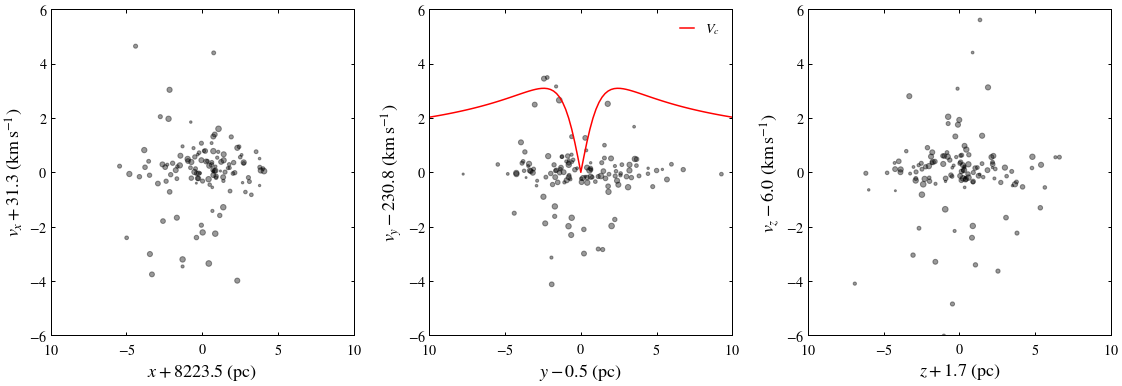

In [144]:
fig, [ax1,ax2, ax3] = plt.subplots(1,3,figsize=(19,6))
fig.subplots_adjust(wspace=0.25)
fig.subplots_adjust(hspace=0.1)

ax1.scatter(galcen.x.value-x_mean, galcen.v_x.value-v_x_mean, c='k', s=4*(14-hy_cat['phot_g_mean_mag']), alpha=0.4, label=None)

ax1.set_xlabel(r'$x+%.1f\ (\mathrm{pc})$' % -x_mean)
ax1.set_ylabel(r'$v_x+%.1f\ (\mathrm{km\,s^{-1}})$' % -v_x_mean)
ax1.set_xlim(-10, 10)
ax1.set_ylim(-6, 6)
ax1.set_xticks([-10, -5, 0, 5, 10])
ax1.set_xticklabels([r'$10$', r'$-5$', r'$0$', r'$5$', r'$10$'])
ax1.set_yticks([-6, -4, -2, 0, 2, 4, 6])
ax1.set_yticklabels([r'$-6$', r'$-4$', r'$-2$', r'$0$', r'$2$', r'$4$', r'$6$'])

y = np.linspace(-10, 10, 101)*u.pc
vr = np.sqrt(cds.G*1e4*cds.Msun)*np.abs(y) / (y**2+3*(u.pc)**2)**(3/4)
vr = vr.to(u.km/u.s)

ax2.scatter(galcen.y.value-y_mean, galcen.v_y.value-v_y_mean, c='k', s=4*(14-hy_cat['phot_g_mean_mag']), alpha=0.4, label=None)
ax2.plot(y.value, vr.value, c='r', label=r'$V_c$')

ax2.set_xlabel(r'$y-%.1f\ (\mathrm{pc})$' % y_mean)
ax2.set_ylabel(r'$v_y-%.1f\ (\mathrm{km\,s^{-1}})$' % v_y_mean)
ax2.set_xlim(-10, 10)
ax2.set_ylim(-6, 6)
ax2.set_xticks([-10, -5, 0, 5, 10])
ax2.set_xticklabels([r'$10$', r'$-5$', r'$0$', r'$5$', r'$10$'])
ax2.set_yticks([-6, -4, -2, 0, 2, 4, 6])
ax2.set_yticklabels([r'$-6$', r'$-4$', r'$-2$', r'$0$', r'$2$', r'$4$', r'$6$'])
ax2.legend()

ax3.scatter(galcen.z.value-z_mean, galcen.v_z.value-v_z_mean, c='k', s=4*(14-hy_cat['phot_g_mean_mag']), alpha=0.4, label=None)

ax3.set_xlabel(r'$z+%.1f\ (\mathrm{pc})$' % -z_mean)
ax3.set_ylabel(r'$v_z-%.1f\ (\mathrm{km\,s^{-1}})$' % v_z_mean)
ax3.set_xlim(-10, 10)
ax3.set_ylim(-6, 6)
ax3.set_xticks([-10, -5, 0, 5, 10])
ax3.set_xticklabels([r'$10$', r'$-5$', r'$0$', r'$5$', r'$10$'])
ax3.set_yticks([-6, -4, -2, 0, 2, 4, 6])
ax3.set_yticklabels([r'$-6$', r'$-4$', r'$-2$', r'$0$', r'$2$', r'$4$', r'$6$'])

plt.savefig('./figures/phase.pdf')
plt.show()

## ($\sqrt{2}/4$)-mass radius

In [80]:
rad = np.sqrt( (galcen.x-x_mean*u.pc)**2 + (galcen.y-y_mean*u.pc)**2 + (galcen.z-z_mean*u.pc)**2 )
rad = np.sort(rad)
print(rad[int(n_hy*np.sqrt(2)/4)-1])

2.9423366153706647 pc


## Velocity dispersion
This part is time expensive... Not vectorized yet.

In [100]:
boot_size = 1000
samp_size = 50

dvx_list = np.zeros(boot_size)
dvy_list = np.zeros(boot_size)
dvz_list = np.zeros(boot_size)

for i in range(boot_size):
    index = np.random.randint(n_hy, size=samp_size)
    dvx_list[i] = np.std(galcen.v_x.value[index])
    dvy_list[i] = np.std(galcen.v_y.value[index])
    dvz_list[i] = np.std(galcen.v_z.value[index])

print('dvx: %f, dvy: %f, dvz: %f' % (np.mean(dvx_list), np.mean(dvy_list), np.mean(dvz_list)))
print('dvx: %f, dvy: %f, dvz: %f' % (np.std(dvx_list), np.std(dvy_list), np.std(dvz_list)))

dvx: 5.053740, dvy: 1.222405, dvz: 1.807037
dvx: 3.145434, dvy: 0.263676, dvz: 0.506721


## Mass estimate

In [115]:
dvy = np.mean(dvy_list)
M_est = 10.05 * (3*u.pc) * (dvy*u.km/u.s)**2 / cds.G
print('mass:', M_est.to(cds.Msun))

mass: 10475.063246552358 Msun
